In [3]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe: 1

In [2]:
# function to scale to any arbitrary bounds
def my_minmaxScalar(x,newmin,newmax):

  # get min and max
  minx = np.min(x)
  maxx = np.max(x)

  # (intermediate) min-max scale to [0,1]
  xS = (x-minx) / (maxx-minx)

  # scale to [a,b]
  xSS = xS*(newmax-newmin) + newmin

  return xSS

In [4]:
# create some data
data = np.random.randn(10)
a,b = 14.3,34

# apply the transform
y = my_minmaxScalar(data,a,b)


print(f'Min value: {np.min(y)}')
print(f'Max value: {np.max(y)}')

Min value: 14.3
Max value: 34.0


In [5]:
# define an instance of MinMaxScalar, with boundary parameters
scaler = MinMaxScaler(feature_range=(a,b))

# fit to the data (data should be a column vector)
scaler.fit(data.reshape(-1,1))

# call the transformer object with the data (again as column vector)
y2 = scaler.transform(data.reshape(-1,1))

# print the min and max values
print(f'Min value: {np.min(y2)}')
print(f'Max value: {np.max(y2)}')

Min value: 14.3
Max value: 34.0


In [6]:
# print out all individual numbers to confirm they're the same
np.hstack((y.reshape(-1,1),y2.reshape(-1,1)))

array([[23.96607028, 23.96607028],
       [18.75888717, 18.75888717],
       [28.5517742 , 28.5517742 ],
       [16.35262039, 16.35262039],
       [22.91820483, 22.91820483],
       [28.55202455, 28.55202455],
       [34.        , 34.        ],
       [14.3       , 14.3       ],
       [29.21017988, 29.21017988],
       [22.61058243, 22.61058243]])

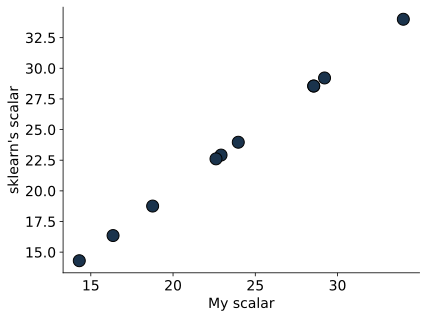

In [7]:
# scatter plot
plt.plot(y,y2,'ko',markerfacecolor=(.1,.2,.3),markersize=12)
plt.xlabel('My scalar')
plt.ylabel("sklearn's scalar")
plt.show()